## Telco Customer Churn
* https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import plot_confusion_matrix, classification_report

from scipy.stats import spearmanr

In [2]:
pd.options.display.max_columns = 25
pd.options.display.float_format = '{:,.2f}'.format
sns.set_style('whitegrid')

## Loading Data

In [3]:
df_raw = pd.read_csv('..\..\Github\Python-data-science\DATA\Telco-Customer-Churn.csv')
df_raw.info()
df = df_raw.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,"1,889.50",No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,"1,840.75",No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.drop(columns='customerID', inplace=True)

## Data Review &EDA

In [6]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No     5163
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

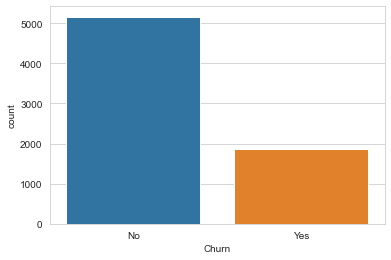

In [7]:
display(df['Churn'].value_counts())
sns.countplot(data=df, x='Churn')

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,"7,032.00","7,032.00","7,032.00","7,032.00"
mean,0.16,32.42,64.80,"2,283.30"
std,0.37,24.55,30.09,"2,266.77"
min,0.00,1.00,18.25,18.80
25%,0.00,9.00,35.59,401.45
50%,0.00,29.00,70.35,"1,397.47"
75%,0.00,55.00,89.86,"3,794.74"
max,1.00,72.00,118.75,"8,684.80"


In [9]:
df.select_dtypes(object).apply(pd.Series.value_counts).\
reindex(['Female', 'Male',
         'Yes', 'No',
         'DSL','Fiber optic','No internet service','No phone service',
         'Month-to-month', 'One year', 'Two year',
         'Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check',  'Mailed check'])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
Female,"3,483.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Male,"3,549.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Yes,nan,"3,393.00","2,099.00","6,352.00","2,967.00",nan,"2,015.00","2,425.00","2,418.00","2,040.00","2,703.00","2,731.00",nan,"4,168.00",nan,"1,869.00"
No,nan,"3,639.00","4,933.00",680.00,"3,385.00","1,520.00","3,497.00","3,087.00","3,094.00","3,472.00","2,809.00","2,781.00",nan,"2,864.00",nan,"5,163.00"
DSL,nan,nan,nan,nan,nan,"2,416.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Fiber optic,nan,nan,nan,nan,nan,"3,096.00",nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
No internet service,nan,nan,nan,nan,nan,nan,"1,520.00","1,520.00","1,520.00","1,520.00","1,520.00","1,520.00",nan,nan,nan,nan
No phone service,nan,nan,nan,nan,680.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Month-to-month,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"3,875.00",nan,nan,nan
One year,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,"1,472.00",nan,nan,nan


In [10]:
cols = ['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity',
        'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

In [11]:
df[df['Churn']=='Yes'].select_dtypes(object).apply(pd.Series.value_counts)[cols].\
reindex(['Yes', 'No',
         'DSL','Fiber optic','No internet service','No phone service'])

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
Yes,669.00,326.00,"1,699.00",850.00,nan,295.00,523.00,545.00,310.00,814.00,818.00
No,"1,200.00","1,543.00",170.00,849.00,113.00,"1,461.00","1,233.00","1,211.00","1,446.00",942.00,938.00
DSL,nan,nan,nan,nan,459.00,nan,nan,nan,nan,nan,nan
Fiber optic,nan,nan,nan,nan,"1,297.00",nan,nan,nan,nan,nan,nan
No internet service,nan,nan,nan,nan,nan,113.00,113.00,113.00,113.00,113.00,113.00
No phone service,nan,nan,nan,170.00,nan,nan,nan,nan,nan,nan,nan


In [12]:
df[df['Churn']=='No'].select_dtypes(object).apply(pd.Series.value_counts)[cols].\
reindex(['Yes', 'No',
         'DSL','Fiber optic','No internet service','No phone service'])

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
Yes,"2,724.00","1,773.00","4,653.00","2,117.00",nan,"1,720.00","1,902.00","1,873.00","1,730.00","1,889.00","1,913.00"
No,"2,439.00","3,390.00",510.00,"2,536.00","1,407.00","2,036.00","1,854.00","1,883.00","2,026.00","1,867.00","1,843.00"
DSL,nan,nan,nan,nan,"1,957.00",nan,nan,nan,nan,nan,nan
Fiber optic,nan,nan,nan,nan,"1,799.00",nan,nan,nan,nan,nan,nan
No internet service,nan,nan,nan,nan,nan,"1,407.00","1,407.00","1,407.00","1,407.00","1,407.00","1,407.00"
No phone service,nan,nan,nan,510.00,nan,nan,nan,nan,nan,nan,nan


<AxesSubplot:xlabel='tenure', ylabel='Count'>

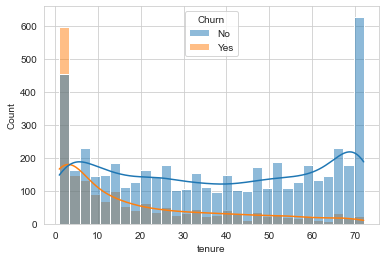

In [13]:
# New subscribers with small tenures are churning at a faster pace / churn slows with tenure (survivorship)
sns.histplot(data=df, x='tenure', bins=30, kde=True, hue='Churn')

In [14]:
# sns.catplot(kind='count', data=df, x='tenure', row='Churn', col='Contract', hue='Churn')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

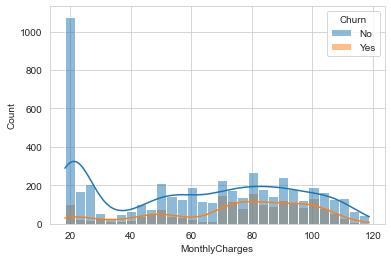

In [15]:
# Percentage of subscribers churning is higher at higher monthly charges
sns.histplot(data=df, x='MonthlyCharges', bins=30, kde=True, hue='Churn')

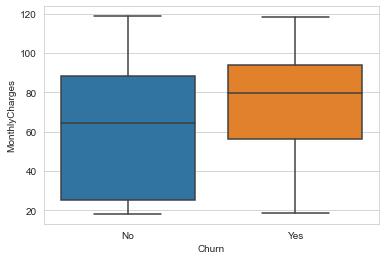

In [16]:
# Subscribers churning have higher monthly charges
sns.boxplot(data=df, x='Churn', y='MonthlyCharges');

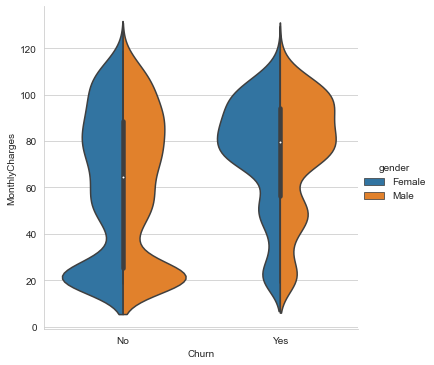

In [17]:
# No discernible relationship w/ gender
sns.catplot(kind='violin', data=df, x='Churn', y='MonthlyCharges', hue='gender', split=True)

<AxesSubplot:xlabel='Contract', ylabel='count'>

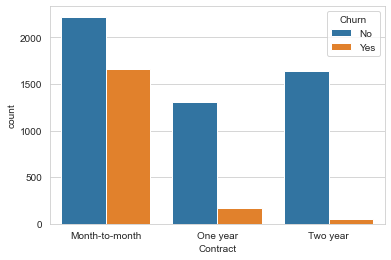

In [18]:
# Subscribers with MTM contract churn at a higher ratio - incentive to get them to sign a contract
sns.countplot(data=df, x='Contract', hue='Churn')

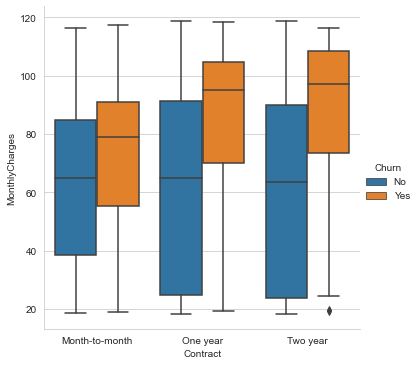

In [19]:
# Subscribers churning have higher monthly charges
sns.catplot(kind='box', data=df, x='Contract', y='MonthlyCharges', hue='Churn')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

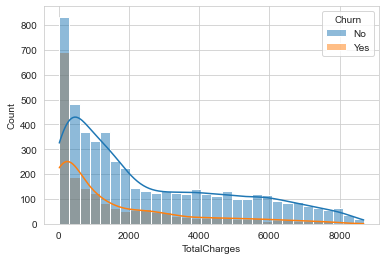

In [20]:
sns.histplot(data=df, x='TotalCharges', bins=30, kde=True, hue='Churn') # Total Charge = Monthly Charge x Tenure

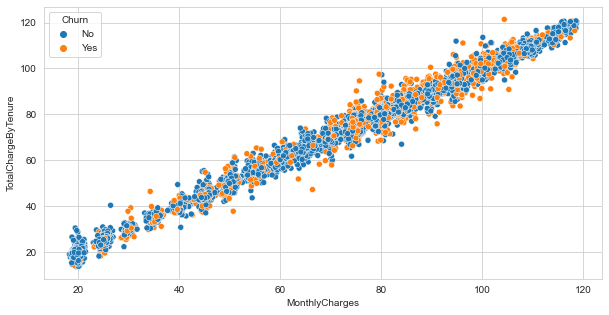

In [21]:
df['TotalChargeByTenure'] = df['TotalCharges']/df['tenure']
plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalChargeByTenure', hue='Churn');

In [22]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')

In [23]:
# plt.figure(figsize=(10,5))
# sns.scatterplot(data=df, x='tenure', y='TotalCharges', hue='Churn');

## Weight of Evidence

In [24]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)

In [25]:
def plot_woe(res, x):
    '''
    called from w/n WOE
    calculates woe and plots
    '''
    res.columns  = ['count', 'ones']
    total_count, total_ones = res.sum()
    total_zeros = total_count - total_ones
    res['zeros'] = res['count'] - res['ones']
    res['woe']   = np.log(res['zeros']*total_ones/(res['ones']*total_zeros))
    sns.barplot(data=res, x=list(res.index), y='woe', color='grey').set_xlabel(x)
    plt.xticks(rotation=45)

    
def woe(df, feats, label):
    '''
    df: dataframe
    x: variable of interest
    y: output variable
    '''
    n = len(feats)
    rows = int(np.ceil(n/3))
    cols = 3
    plt.figure(figsize=(15, 5*rows))
    
    for i, x in enumerate(feats):
        
        # Categorical feature
        if df[x].dtype == object:
            res = df[[x,label]].groupby(by=x).agg(['count', 'sum'])
            plt.subplot(rows, cols, i+1)
            plot_woe(res, x)

        
        # Numeric feature - try binning
        else:
            for bins_num in range(20, 1, -1):
                df['bin']  = pd.qcut(df[x], bins_num, duplicates='drop').apply(lambda x: x.left).astype(float)
                df_grouped = pd.DataFrame(df.groupby('bin').agg({x:'count', label: 'sum'})).reset_index()
                r = abs(spearmanr(df_grouped['bin'], df_grouped[label]/df_grouped[x])[0])   #/df[x] because of uneven size
                
                if (
                    r==1 
                    and df_grouped[x].min() > .05*df_grouped[x].sum()       # minimum 5% in each bucket
                    and not (df_grouped[x] == df_grouped[label]).any()      # contains both events/ non-events
                ): 
                    break

            res = df[['bin',label]].groupby(by='bin').agg(['count', 'sum'])
            plt.subplot(rows, cols, i+1)
            plot_woe(res, x)

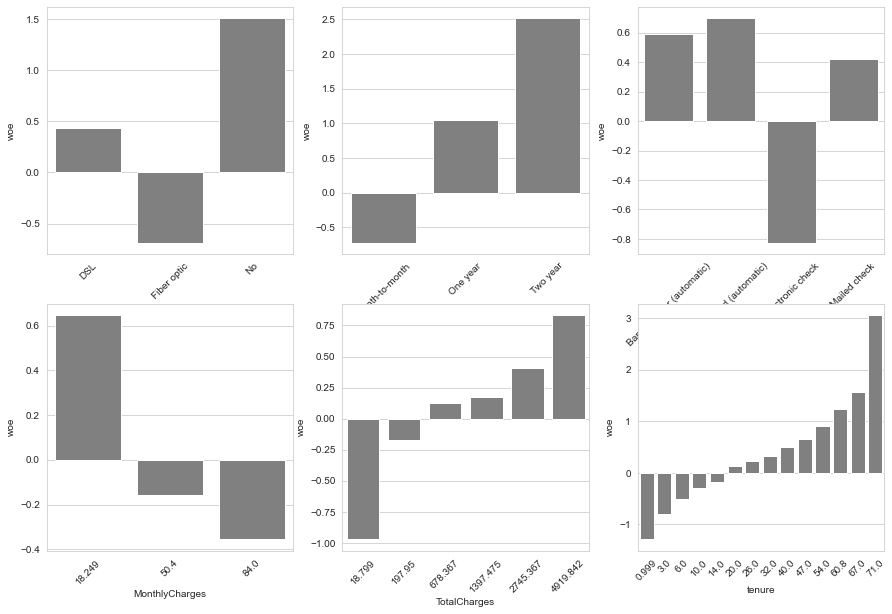

In [26]:
feats = ['InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure']
woe(df, feats, 'Churn');

## Churn Analysis

In [27]:
dummycols = pd.get_dummies(df.select_dtypes(object))
correlation_churn = pd.concat([df.select_dtypes(exclude=object), dummycols], axis=1).corr()['Churn'].sort_values()
correlation_churn = correlation_churn[correlation_churn.abs()<1]
correlation_churn

tenure                                    -0.35
bin                                       -0.35
Contract_Two year                         -0.30
StreamingMovies_No internet service       -0.23
OnlineSecurity_No internet service        -0.23
OnlineBackup_No internet service          -0.23
DeviceProtection_No internet service      -0.23
TechSupport_No internet service           -0.23
StreamingTV_No internet service           -0.23
InternetService_No                        -0.23
TotalCharges                              -0.20
PaperlessBilling_No                       -0.19
Contract_One year                         -0.18
OnlineSecurity_Yes                        -0.17
TechSupport_Yes                           -0.16
Dependents_Yes                            -0.16
Partner_Yes                               -0.15
PaymentMethod_Credit card (automatic)     -0.13
InternetService_DSL                       -0.12
PaymentMethod_Bank transfer (automatic)   -0.12
PaymentMethod_Mailed check              

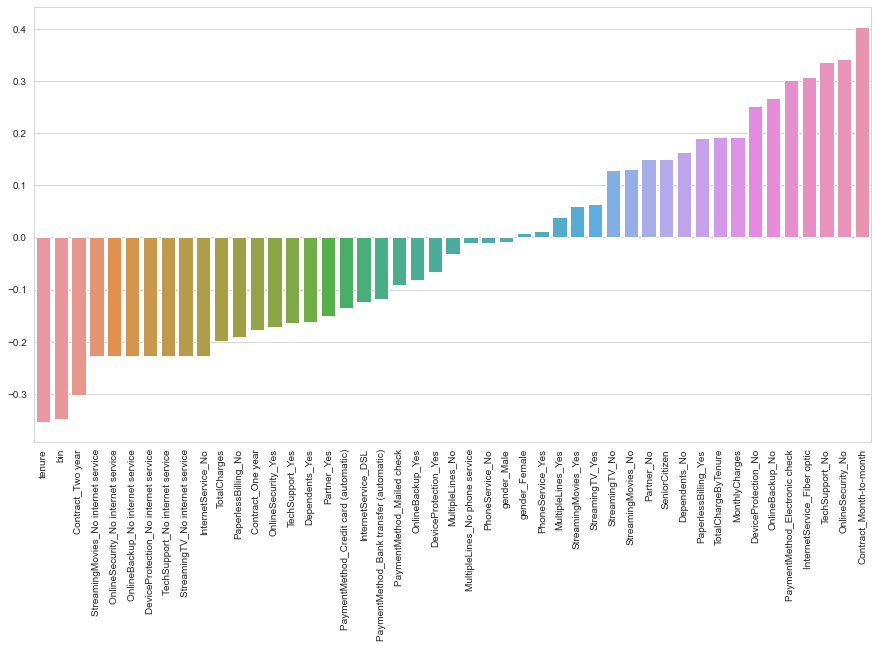

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x=correlation_churn.index, y=correlation_churn.values);
plt.xticks(rotation=90);

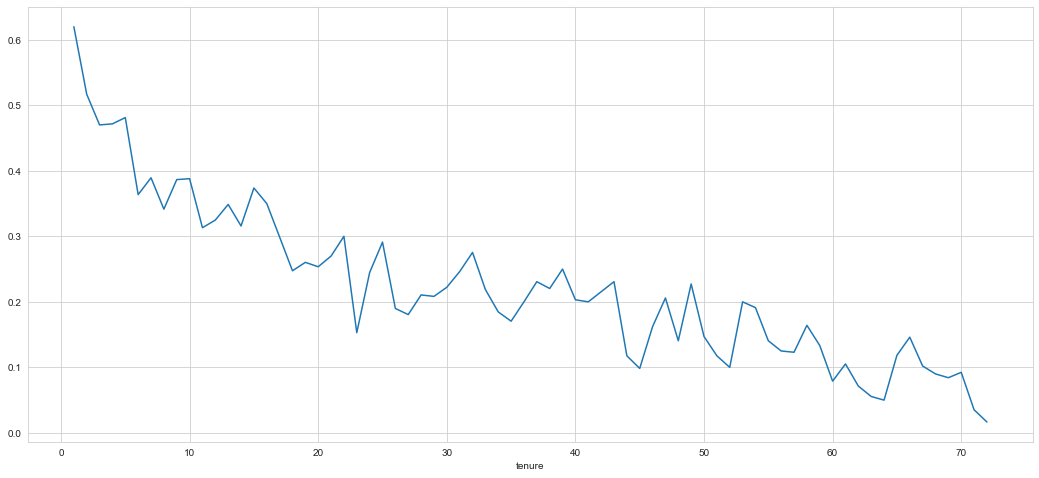

In [29]:
churn_tenure = df.groupby(by='tenure')['Churn'].mean()

plt.figure(figsize=(18,8))
sns.lineplot(x=churn_tenure.index, y=churn_tenure.values);

In [30]:
df['tenureGrp'] = pd.qcut(df['tenure'], 5)

display(df.groupby(by=['tenureGrp'])[['Churn']].count().T)
df.groupby(by=['tenureGrp']).mean().T

tenureGrp,"(0.999, 6.0]","(6.0, 20.0]","(20.0, 40.0]","(40.0, 60.8]","(60.8, 72.0]"
Churn,1470,1397,1408,1350,1407


tenureGrp,"(0.999, 6.0]","(6.0, 20.0]","(20.0, 40.0]","(40.0, 60.8]","(60.8, 72.0]"
SeniorCitizen,0.15,0.16,0.18,0.17,0.16
tenure,2.53,12.82,29.93,50.66,68.11
MonthlyCharges,54.84,59.88,64.66,69.25,75.95
TotalCharges,143.64,769.43,"1,939.03","3,519.09","5,180.67"
Churn,0.53,0.33,0.22,0.16,0.07
TotalChargeByTenure,54.83,59.92,64.56,69.30,75.97
bin,1.57,10.05,26.09,46.78,65.56


In [31]:
# not in-sync with WOE bands
def tenure_band(x):
    if x <= 6: return '<6m'
    elif x <= 12: return '6-12m'
    elif x <= 24: return '12-24m'
    elif x <= 48: return '24-48m'
    elif x > 48: return '>48'

In [32]:
df['tenureGrp'] = df['tenure'].apply(tenure_band)
df.groupby(by=['tenureGrp']).mean().sort_values(by='Churn', ascending=False).T

tenureGrp,<6m,6-12m,12-24m,24-48m,>48
SeniorCitizen,0.15,0.15,0.16,0.18,0.17
tenure,2.53,9.40,18.35,36.19,63.05
MonthlyCharges,54.84,58.95,61.36,65.93,73.95
TotalCharges,143.64,553.91,"1,126.26","2,390.45","4,685.51"
Churn,0.53,0.36,0.29,0.20,0.10
TotalChargeByTenure,54.83,59.11,61.30,65.87,73.97
bin,1.57,7.23,15.22,32.16,59.95


<AxesSubplot:xlabel='tenureGrp', ylabel='count'>

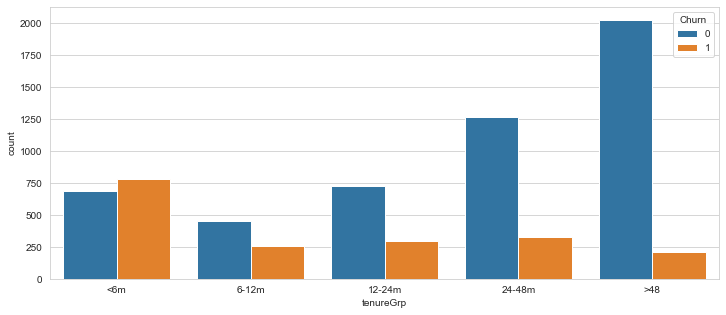

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='tenureGrp', hue='Churn', order=['<6m','6-12m','12-24m','24-48m','>48'])

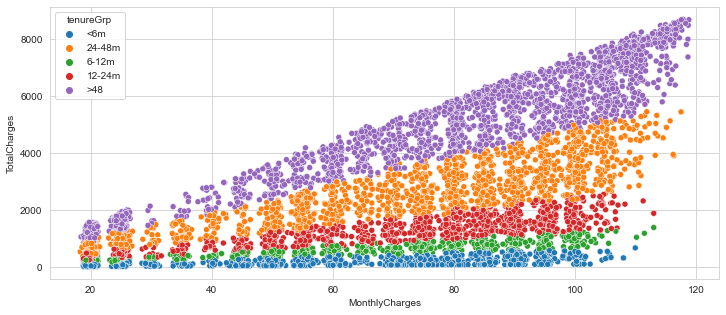

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='tenureGrp');

<Figure size 1080x360 with 0 Axes>

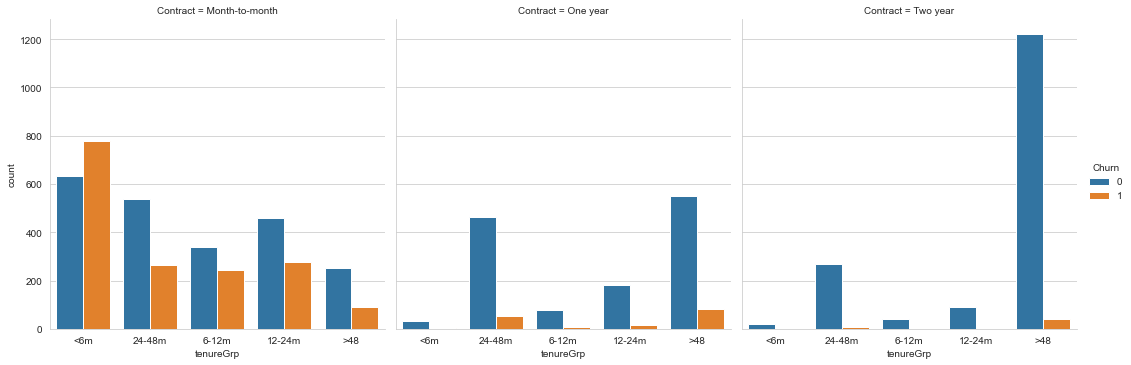

In [35]:
plt.figure(figsize=(15,5))
sns.catplot(kind='count', data=df, col='Contract', x='tenureGrp', hue='Churn');

In [36]:
def monthlycharge_band(x):
    if x <50: return '<50'
    elif x <= 85: return '50-85'
    elif x > 85: return '>85'

In [37]:
df['MonthlyChargesGrp'] = df['MonthlyCharges'].apply(monthlycharge_band)
df.groupby(by=['MonthlyChargesGrp']).mean().sort_values(by='Churn').T

MonthlyChargesGrp,<50,50-85,>85
SeniorCitizen,0.07,0.17,0.26
tenure,26.93,28.67,42.54
MonthlyCharges,27.45,69.59,98.26
TotalCharges,708.81,"2,000.36","4,260.29"
Churn,0.16,0.30,0.34
TotalChargeByTenure,27.43,69.61,98.26
bin,24.36,25.99,39.44


## Modeling

In [38]:
df = df_raw.copy()

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)

df['tenureGrp'] = df['tenure'].apply(tenure_band)
df['MonthlyChargesGrp'] = df['MonthlyCharges'].apply(monthlycharge_band)

df = df.drop(columns=['customerID', 'TotalCharges'])
# df = df.drop(columns=['tenure', 'MonthlyCharges', ])

y = df['Churn']
X = df.drop(columns='Churn')

dummy_cols = pd.get_dummies(X.select_dtypes(object), drop_first=True)
X = pd.concat([X.select_dtypes(exclude=object), dummy_cols], axis=1)

In [39]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGrp_24-48m,tenureGrp_6-12m,tenureGrp_<6m,tenureGrp_>48,MonthlyChargesGrp_<50,MonthlyChargesGrp_>85
0,0,1,29.85,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0,1,0
1,0,34,56.95,1,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0,0,0
2,0,2,53.85,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0
4,0,2,70.70,0,0,0,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0,0,0


In [40]:
# Ideally this should be done before determining 'tenure bands'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
display(X_train.shape, X_test.shape)

(6328, 35)

(704, 35)

In [41]:
def show_summary(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test, y_test)
    return model

### Decision Tree

In [42]:
dt = DecisionTreeClassifier()
param_grid  = {'max_depth':[4,5,6,7,8,9,10]}
grid = GridSearchCV(dt, param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 5}

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       557
           1       0.56      0.48      0.51       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



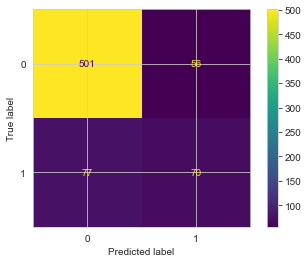

In [43]:
dt = DecisionTreeClassifier(max_depth=6)
dt = show_summary(dt)

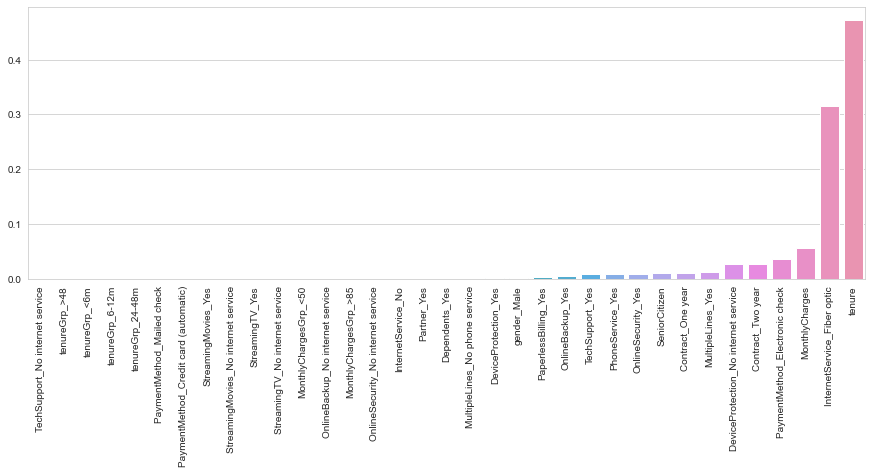

In [44]:
fi = pd.Series(index=X_train.columns, data=dt.feature_importances_)
fi = fi.sort_values()

plt.figure(figsize=(15,5))
sns.barplot(x=fi.index, y=fi.values)
plt.xticks(rotation=90);

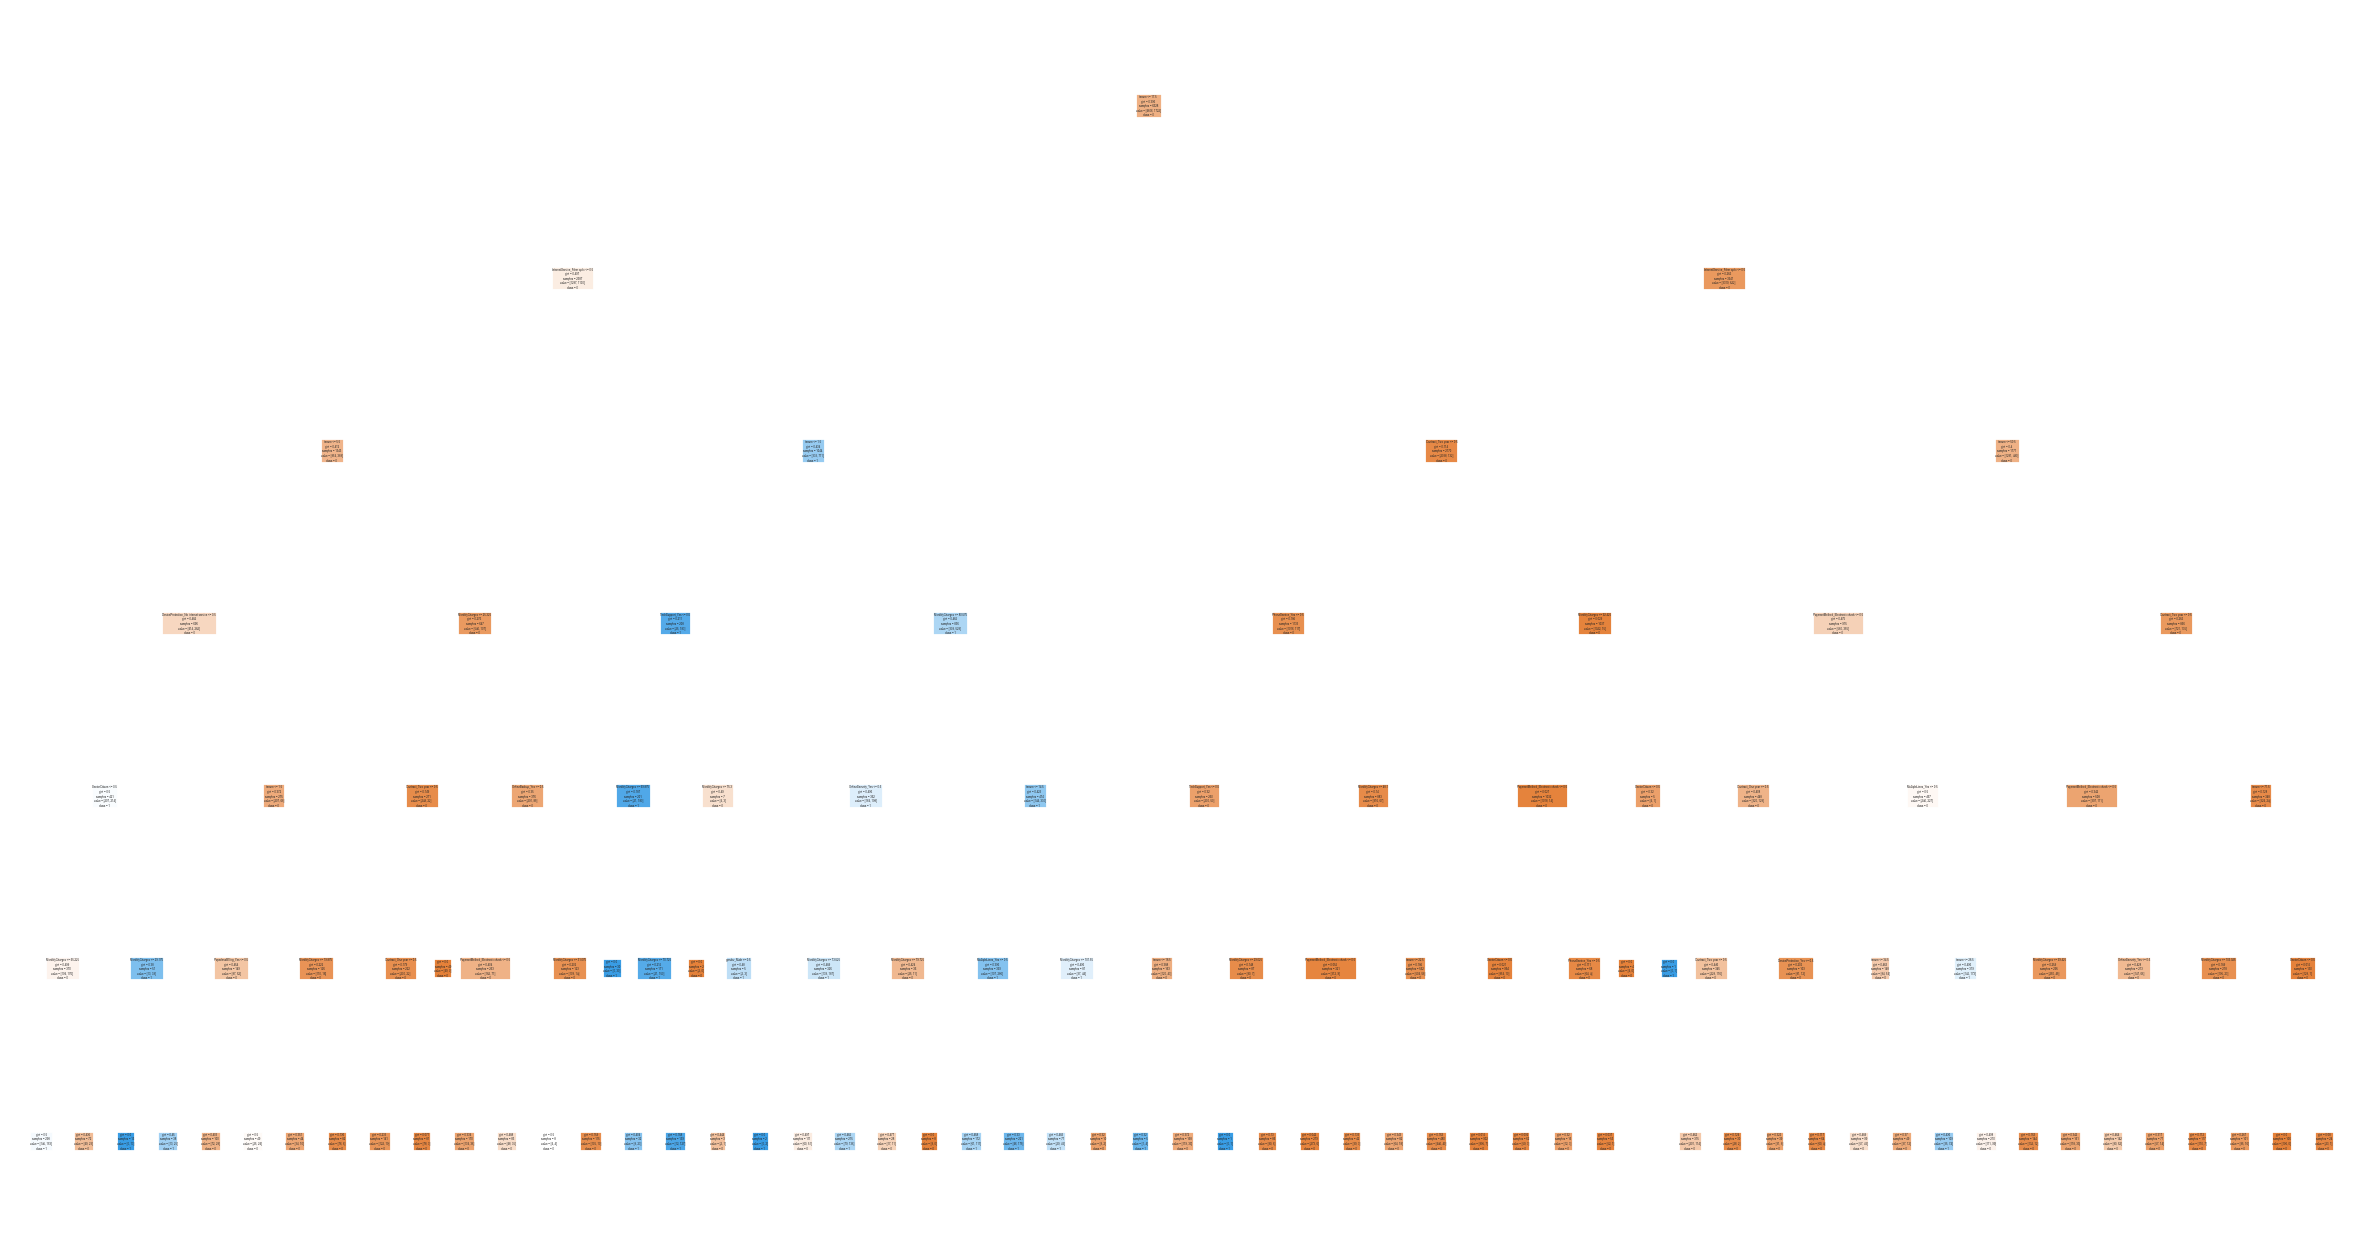

In [45]:
plt.figure(figsize=(15,8), dpi = 200)
plot_tree(dt, filled=True, feature_names=X_train.columns, class_names=['0', '1']);
plt.savefig('temp.png', dpi=500)

### Random Forest

In [46]:
rfc = RandomForestClassifier()
param_grid  = {'max_depth':[5,6,7,8,9,10], 
               'n_estimators':[100,300]}
grid = GridSearchCV(rfc, param_grid)
grid.fit(X_train, y_train)
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       557
           1       0.62      0.48      0.54       147

    accuracy                           0.83       704
   macro avg       0.74      0.70      0.72       704
weighted avg       0.82      0.83      0.82       704



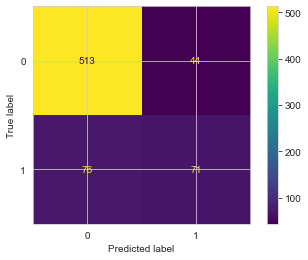

In [47]:
rfc = RandomForestClassifier(max_depth=9, n_estimators=100)
rfc = show_summary(rfc)

### Boosted Trees

In [48]:
param_grid  = {'n_estimators':[50, 100, 200],
               'learning_rate':[1, .1, .01]}
grid = GridSearchCV(AdaBoostClassifier(), param_grid)
grid.fit(X_train, y_train)
grid.best_params_                                 #default values

{'learning_rate': 1, 'n_estimators': 50}

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       557
           1       0.61      0.52      0.56       147

    accuracy                           0.83       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



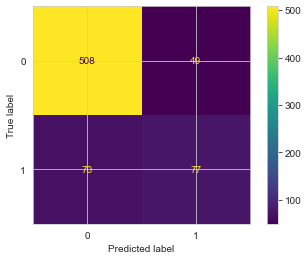

In [49]:
ada = AdaBoostClassifier()
ada = show_summary(ada)

In [50]:
param_grid  = {'n_estimators':[50, 100, 200],
               'learning_rate':[1, .1, .01]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid)
grid.fit(X_train, y_train)
grid.best_params_                                #default values

{'learning_rate': 0.1, 'n_estimators': 50}

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       557
           1       0.59      0.52      0.55       147

    accuracy                           0.82       704
   macro avg       0.73      0.71      0.72       704
weighted avg       0.82      0.82      0.82       704



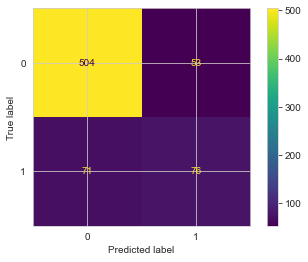

In [51]:
gb = GradientBoostingClassifier()
gb = show_summary(gb)